In [1]:
# Import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Uncomment the following lines if you
# need to download the nltk packages
# nltk.download("stopwords")
# nltk.download('punkt')

import xml.etree.ElementTree as et
from urllib.request import urlopen
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import numpy as np
from nltk import FreqDist

In [2]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [3]:
import xgboost,textblob
from keras.preprocessing import text, sequence
import tensorflow as tf
from keras import layers, models, optimizers

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [4]:
from gensim.models import Word2Vec as w2v
import sklearn.manifold
import matplotlib.pyplot as plt
import seaborn as sns

unable to import 'smart_open.gcs', disabling that module


In [5]:
# Load label data from the github repositoy
training_labels = pd.read_csv("../Assessment2_data/train_labels.csv")
testing = pd.read_csv("../Assessment2_data/test.csv")

# Load the stopwords from the nltk corpus
stopwords = stopwords.words("english")

In [6]:
# A glimpse of the label data
print(training_labels.head(5))
print(testing.head(5))

                                 id  gender
0  d7d392835f50664fc079f0f388e147a0    male
1  ee40b86368137b86f51806c9f105b34b  female
2  919bc742d9a22d65eab1f52b11656cab    male
3  15b97a08d65f22d97ca685686510b6ae  female
4  affa98421ef5c46ca7c8f246e0a134c1  female
                                 id  gender  language
0  d6b08022cdf758ead05e1c266649c393     NaN       NaN
1  9a989cb04766d5a89a65e8912d448328     NaN       NaN
2  2a1053a059d58fbafd3e782a8f7972c0     NaN       NaN
3  6032537900368aca3d1546bd71ecabd1     NaN       NaN
4  d191280655be8108ec9928398ff5b563     NaN       NaN


In [7]:
# The function to convert the xml file into lines of content
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def parseXML(id):
    # The path is subject to change to adapt to
    # different development environment
    path = "../Assessment2_data/data/data/" + id + ".xml"
    xmltree = et.parse(path)
    language = xmltree.getroot().attrib["lang"]
    documents_node = list(xmltree.getroot())[0]
    documents = []
    lemmatizer=WordNetLemmatizer()
    for i in list(documents_node):
        words = nltk.word_tokenize(i.text.lower())
        pattern = r"\w+"
        translator = str.maketrans('', '', string.punctuation)
        for j in words:
            j = j.translate(translator)
            j = deEmojify(j)
            if len(j)>=3 and j not in stopwords and re.match(pattern,j) and j.isalpha():
                documents.append(lemmatizer.lemmatize(j))
    
    return id, language, documents

In [8]:
# reserve stopwords for word2vec embedding
def XML_parser(id):
    # The path is subject to change to adapt to
    # different development environment
    path = "../Assessment2_data/data/data/" + id + ".xml"
    xmltree = et.parse(path)
    language = xmltree.getroot().attrib["lang"]
    documents_node = list(xmltree.getroot())[0]
    documents = []
    lemmatizer=WordNetLemmatizer()
    for i in list(documents_node):
        words = nltk.word_tokenize(i.text.lower())
        pattern = r"\w+"
        translator = str.maketrans('', '', string.punctuation)
        for j in words:
            j = j.translate(translator)
            j = deEmojify(j)
            if re.match(pattern,j):
                documents.append(lemmatizer.lemmatize(j))
    
    return id, language, documents

In [9]:
parseXML("d7d392835f50664fc079f0f388e147a0")

('d7d392835f50664fc079f0f388e147a0',
 'en',
 ['csiferroscan',
  'youch',
  'good',
  'thing',
  'know',
  'sort',
  'stuff',
  'repairable',
  'succumbed',
  'fomo',
  'bought',
  'gnr',
  'ticket',
  'remember',
  'asking',
  'parent',
  'buy',
  'gnr',
  'lie',
  'album',
  'young',
  'boy',
  'booby',
  'inside',
  'brown',
  'eye',
  'broom',
  'cool',
  'rescue',
  'clear',
  'broken',
  'window',
  'wellington',
  'theaccnz',
  'http',
  'shout',
  'auckland',
  'tennis',
  'fan',
  'get',
  'sleep',
  'morning',
  'worth',
  'watch',
  'win',
  'federer',
  'needcoffee',
  'someone',
  'ball',
  'come',
  'okcthunder',
  'hey',
  'guy',
  'release',
  'coming',
  'christmas',
  'day',
  'jersey',
  'juliereddish',
  'yeah',
  'curiosity',
  'got',
  'better',
  'juliereddish',
  'rewound',
  'paused',
  'one',
  'best',
  'decision',
  'good',
  'see',
  'steve',
  'adam',
  'upping',
  'def',
  'game',
  'since',
  'coming',
  'back',
  'blks',
  'game',
  'plus',
  'one',
  'g

In [10]:
XML_parser("d7d392835f50664fc079f0f388e147a0")

('d7d392835f50664fc079f0f388e147a0',
 'en',
 ['csiferroscan',
  'youch',
  'good',
  'thing',
  'to',
  'know',
  'is',
  'that',
  'sort',
  'of',
  'stuff',
  'repairable',
  'succumbed',
  'to',
  'fomo',
  'and',
  'bought',
  'gnr',
  'ticket',
  'remember',
  'asking',
  'parent',
  'to',
  'buy',
  'gnr',
  'lie',
  'album',
  'a',
  'a',
  'young',
  'boy',
  'because',
  'it',
  'had',
  'booby',
  'inside',
  'brown',
  'eye',
  'broom',
  'a',
  'cool',
  '73',
  'then',
  'to',
  'the',
  'rescue',
  'to',
  'clear',
  'out',
  'some',
  'broken',
  'window',
  'in',
  'wellington',
  'theaccnz',
  'http',
  'tcoeoymdswyx5',
  'shout',
  'out',
  'to',
  'auckland',
  'tennis',
  'fan',
  'who',
  'get',
  'to',
  'sleep',
  'in',
  'this',
  'morning',
  'but',
  'worth',
  'it',
  'to',
  'watch',
  'the',
  'win',
  '18',
  'federer',
  'needcoffee',
  'nickyoung210',
  'someone',
  'had',
  'some',
  'ball',
  'to',
  'come',
  'up',
  'with',
  'that',
  'okcthunder',


In [11]:
train_DF = training_labels.copy()
train_DF

id  gender
0     d7d392835f50664fc079f0f388e147a0    male
1     ee40b86368137b86f51806c9f105b34b  female
2     919bc742d9a22d65eab1f52b11656cab    male
3     15b97a08d65f22d97ca685686510b6ae  female
4     affa98421ef5c46ca7c8f246e0a134c1  female
...                                ...     ...
3095  97159e619b8d88bdd837f7f7e738de43    male
3096  9bccadb3d0033a2b2ad4403184ea72f5  female
3097  f252cb406d4c27e71414148175fe6878  female
3098  5dcf483c6ceb4cdf9de1648486f28706  female
3099  5e877ae08d481609c0a828aaa2ba9bb0    male

[3100 rows x 2 columns]

In [12]:
for i in range(len(train_DF)):
    token = parseXML(train_DF.iloc[i,0])[2]
    train_DF.iloc[i,0] = " ".join(token)
train_DF.columns = ["text","label"]
train_DF.head(5)

text   label
0  csiferroscan youch good thing know sort stuff ...    male
1  donald menace thankscomey http return national...  female
2  seems super sketch good true http legit invisi...    male
3  text dad saturday night plan westernbulldogs t...  female
4  irrevocably love talented human proud tote sla...  female

## Remove 0.05 rare token and 0.95 frequent token

In [127]:
# preparing dataframe to perform rare token and frequent token removal
no_stopword_DF = train_DF.copy()

# collect all tokens
no_stopword_full_doc = no_stopword_DF.text.values.tolist()
no_stopword_full_token = []
for doc in no_stopword_full_doc:
    tmp_list = doc.split()
    for words in tmp_list:
        no_stopword_full_token.append(words)

# dictionary for word : count
wpd = FreqDist(no_stopword_full_token)

# store the target tokens in a list
word_to_remove = []
for word, count in wpd.items():
    if (count/len(no_stopword_full_token) < 0.05) or (count/len(no_stopword_full_token) > 0.95):
        word_to_remove.append(word)


In [ ]:
no_stopword_DF.text.apply(lambda x: [item for item in x if item not in word_to_remove])

# Preparing for Neural Network with Keras

### Neural Network (NN) for text classification works well with well tuned word2vec matix. This is because of Neural Network's learning process. NN automatically tune each layer with a random weight and  learn from mistakes by comparing the prediction $\hat{y}$ with the True value $y$ then adjust its weight in the next epoch.

### Due to this characteristic, NN is able to end up with a good estimation of the weights of latent factors behind inputs. However, when performing text classification, there is a way that allows us to 'teach' NN how to learn from texts. This can be done by pre-train text vectors with various tools such as Word2Vec, Doc2Vec, fasttext by Gensim, GloVe, and so on. Once we obtained a weighted text vector matrix from these tools, we can pass it to NN and let NN learn more wisely.

### In this assignment, we will explore with Word2Vec for it's a statistical method specially developed for Neural Network by Tomas Mikolov, et al. at Google in 2013.

### There are two main techniques for word embedding:
* Frequency based Embedding
* Prediction based Embedding

#### Word2Vec belongs to prediction based and takes a tokenized text corpus and calculate with two techniques:
* CBOW(Continuous Bag of Words)
* Skip-Gram


The objective function in CBOW it is negative log-likelihood of a word given a set of content, $-log(p(w_o/w_i))$, where $p(w_o/w_i)$ is given as: 
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/04230048/AAEAAQAAAAAAAA18AAAAJGNkMGYxMDIxLWY5NjgtNGEzMy1hMjAyLWU4MmI4ZWUwNDNhYw-300x91.jpg)
$w_o$: output word

$w_i$: content words

The activation function for CBOW is linear function

In [13]:
train_origin = training_labels.copy()

full_token = []
for i in range(len(train_origin)):
    token = XML_parser(train_origin.iloc[i,0])[2]
    train_origin.iloc[i,0] = " ".join(token)
    for word in token:
            full_token.append(word)

In [14]:
len(full_token)

4517247

In [49]:
full_token[:300]

['csiferroscan',
 'youch',
 'good',
 'thing',
 'to',
 'know',
 'is',
 'that',
 'sort',
 'of',
 'stuff',
 'repairable',
 'succumbed',
 'to',
 'fomo',
 'and',
 'bought',
 'gnr',
 'ticket',
 'remember',
 'asking',
 'parent',
 'to',
 'buy',
 'gnr',
 'lie',
 'album',
 'a',
 'a',
 'young',
 'boy',
 'because',
 'it',
 'had',
 'booby',
 'inside',
 'brown',
 'eye',
 'broom',
 'a',
 'cool',
 '73',
 'then',
 'to',
 'the',
 'rescue',
 'to',
 'clear',
 'out',
 'some',
 'broken',
 'window',
 'in',
 'wellington',
 'theaccnz',
 'http',
 'tcoeoymdswyx5',
 'shout',
 'out',
 'to',
 'auckland',
 'tennis',
 'fan',
 'who',
 'get',
 'to',
 'sleep',
 'in',
 'this',
 'morning',
 'but',
 'worth',
 'it',
 'to',
 'watch',
 'the',
 'win',
 '18',
 'federer',
 'needcoffee',
 'nickyoung210',
 'someone',
 'had',
 'some',
 'ball',
 'to',
 'come',
 'up',
 'with',
 'that',
 'okcthunder',
 'hey',
 'guy',
 'are',
 'there',
 'any',
 'more',
 'release',
 'coming',
 'of',
 'the',
 '2016',
 'christmas',
 'day',
 'jersey',
 'ju

In [16]:
tok_corp = [nltk.word_tokenize(word) for word in full_token]

In [17]:
train_origin.columns = ["text","label"]
train_origin.head(5)

text   label
0  csiferroscan youch good thing to know is that ...    male
1  donald the menace thankscomey http tcoj4kudwhk...  female
2  this seems super sketch too good to be true ht...    male
3  just some text with my dad about our saturday ...  female
4  irrevocably love this talented human and so pr...  female

In [18]:
print("The token corpus contains {0:,} tokens".format(len(tok_corp)))

The token corpus contains 4,517,247 tokens


In [37]:

word2vec = w2v(sg=1, seed=10, min_count=10, size=20, window=7, workers=4)

In [38]:
word2vec.build_vocab(tok_corp)

In [39]:
print("Word2Vec vocabulary length:", len(word2vec.wv.vocab))

Word2Vec vocabulary length: 20195


In [40]:
word2vec.train(tok_corp, epochs=10, total_examples=word2vec.corpus_count)

(31325502, 45172470)

In [41]:
word2vec.wv.similarity('man', 'woman')

0.23214506

In [42]:
word2vec.wv.similarity('usa', 'america')

0.056830477

In [46]:
word2vec.wv.similarity('man', 'guy')

-0.45940164

In [44]:
word2vec.wv.similarity('school', 'teacher')

0.033846132

In [45]:
word2vec.wv.similarity('apple', 'orange')

0.09629972

In [50]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=19, n_iter=250)

In [51]:
all_word_vectors_matrix = word2vec.wv.syn0

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [52]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [53]:
points = pd.DataFrame(
    [
        (word, axis[0], axis[1])
        for word, axis in [
            (word, all_word_vectors_matrix_2d[word2vec.wv.vocab[word].index])
            for word in word2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [54]:
points.head(10)

word          x          y
0       good  12.542311  -3.261944
1      thing   7.689204  -3.559002
2         to   5.225439   5.728539
3       know  -8.229013   5.482772
4         is   3.163144  12.410211
5       that -11.706208   2.041689
6       sort  -2.354370  -4.536702
7         of  -6.334767  -0.658108
8      stuff   7.540577  -8.580024
9  succumbed   3.715438  10.222661

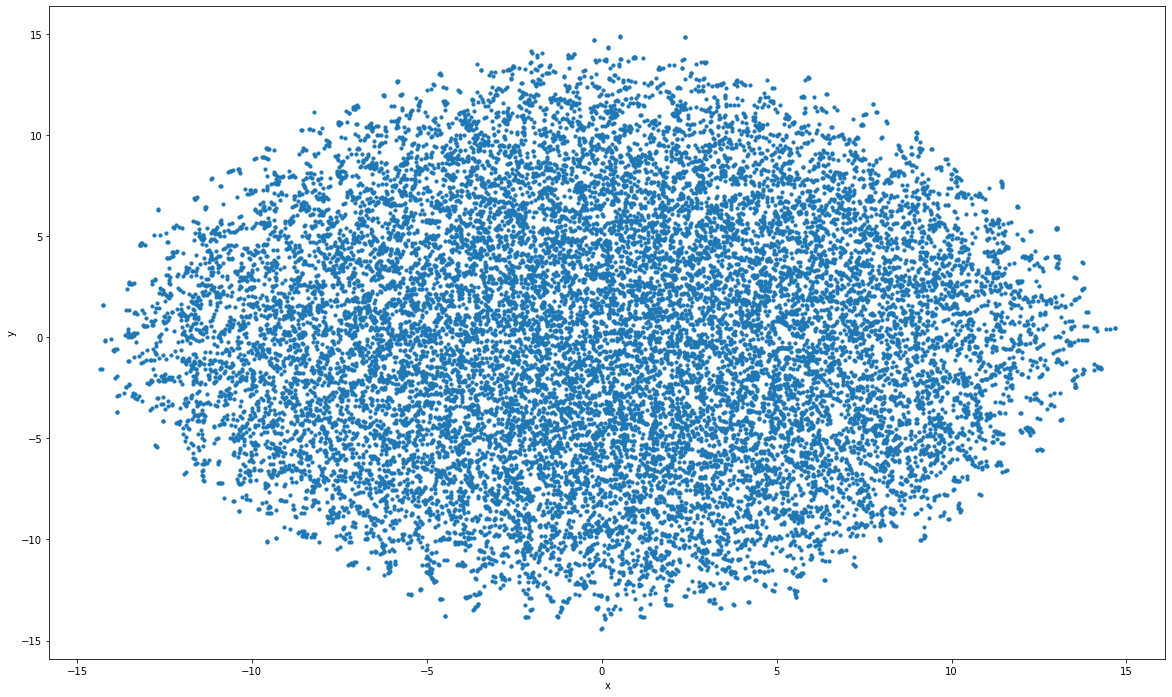

In [55]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [57]:
word2vec.wv.most_similar("man")

[('devpolicy', 0.7977582216262817),
 ('leisure', 0.7652869820594788),
 ('todd', 0.7567497491836548),
 ('qaeda', 0.7301861643791199),
 ('impulsive', 0.7185323238372803),
 ('harrypotter', 0.7173272371292114),
 ('liner', 0.6948839426040649),
 ('fakenews', 0.6875816583633423),
 ('kehazaei', 0.6762235760688782),
 ('tyre', 0.666388988494873)]

In [ ]:
word2vec.save('word2vec.model')

In [58]:
# split the dataset into training and validation datasets 
train_x_origin, valid_x_origin, train_y_origin, valid_y_origin = model_selection.train_test_split(train_origin['text'], train_origin['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y_origin = encoder.fit_transform(train_y_origin)
valid_y_origin = encoder.fit_transform(valid_y_origin)

In [59]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(train_origin['text'])
word_index = token.word_index

In [60]:
# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x_origin), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x_origin), maxlen=70)


In [61]:
train_seq_x

array([[  1851,    269,  10880, ...,  66503,      1, 139265],
       [     1, 274433,  82952, ..., 274436,      1, 274437],
       [    97,      4,    567, ...,     29,    997,  45920],
       ...,
       [   202,   2046,   2049, ...,    754,    311,  10158],
       [     4,  17432,      6, ...,     10,      4,    189],
       [   173,      4,    820, ...,      2, 247283,    636]])

In [63]:
w2vec = dict(zip(word2vec.wv.index2word, word2vec.wv.syn0))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [65]:
# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 20))
for word, i in word_index.items():
    embedding_vector = w2vec.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [66]:
embedding_matrix.shape

(338317, 20)

In [ ]:
#  change label to 0 and 1 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(no_stopword_DFF["label"])

train_x = no_stopword_DF["text"]

In [ ]:
#  count feature
count_vect = CountVectorizer(min_df=0.05,max_df=0.95)
count_vect.fit(no_stopword_DFF['text'])
train_count =  count_vect.transform(train_x)

In [69]:
train_count

<3100x1701 sparse matrix of type '<class 'numpy.int64'>'
	with 799340 stored elements in Compressed Sparse Row format>

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(min_df=0.05,max_df=0.95)
tfidf_vect.fit(no_stopword_DF['text'])
train_tfidf =  tfidf_vect.transform(train_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,3), min_df=0.05,max_df=0.95)
tfidf_vect_ngram.fit(no_stopword_DFF['text'])
train_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)


# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',min_df=0.05,max_df=0.95,ngram_range=(1,3))
tfidf_vect_ngram_chars.fit(no_stopword_DF['text'])
train_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 

In [71]:
# word level tf-idf
tfidf_vect_origin = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')#, max_features=5000)
tfidf_vect_origin.fit(train_origin['text'])
xtrain_tfidf =  tfidf_vect_origin.transform(train_x_origin)
xvalid_tfidf =  tfidf_vect_origin.transform(valid_x_origin)

# ngram level tf-idf 
tfidf_vect_ngram_origin = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3))#, max_features=5000)
tfidf_vect_ngram_origin.fit(train_origin['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram_origin.transform(train_x_origin)
xvalid_tfidf_ngram =  tfidf_vect_ngram_origin.transform(valid_x_origin)

# characters level tf-idf
tfidf_vect_ngram_chars_origin = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3))#, max_features=5000)
tfidf_vect_ngram_chars_origin.fit(train_origin['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars_origin.transform(train_x_origin) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars_origin.transform(valid_x_origin) 

D:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [72]:
# create a count vectorizer object 
count_vect_origin = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect_origin.fit(train_origin['text'])

# transform the training and validation data using count vectorizer object
xtrain_count_origin =  count_vect_origin.transform(train_x_origin)
xvalid_count_origin =  count_vect_origin.transform(valid_x_origin)

In [73]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y_origin)

In [74]:
def train_neural(model, feature_vector_train, label, epochs=5):
    # fit the training dataset on the classifier
    model.fit(feature_vector_train, label, batch_size=50, epochs=epochs)
    _, accuracy = model.evaluate(feature_vector_train,label)
    return accuracy

In [75]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 20, weights=[embedding_matrix], trainable=True)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y_origin, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
2325/2325 [==============================] - 6s 2ms/step - loss: 0.6934
CNN, Word Embeddings 0.47870967741935483


In [80]:
def create_rnn_lstm():
     # Add an Input Layer
    input_layer = layers.Input((None, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 20, weights=[embedding_matrix], trainable=True)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.5)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(64, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.5)(output_layer1)
    
    output_layer2 = layers.Dense(32, activation="relu")(output_layer1)
    output_layer2 = layers.Dropout(0.5)(output_layer2)
    
    output_layer3 = layers.Dense(16, activation="relu")(output_layer2)
    output_layer3 = layers.Dropout(0.5)(output_layer3)
    output_layer_final = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer_final)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

rnn_lstm = create_rnn_lstm()
accuracy = train_neural(rnn_lstm, train_seq_x, train_y_origin)
print("RNN-LSTM with Word Embedding's accuracy is: ",  accuracy)

Epoch 1/5
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6936 - accuracy: 0.4929
Epoch 2/5
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6939 - accuracy: 0.5157
Epoch 3/5
2325/2325 [==============================] - 5s 2ms/step - loss: 0.6612 - accuracy: 0.5815
Epoch 4/5
2325/2325 [==============================] - 5s 2ms/step - loss: 0.4057 - accuracy: 0.8460
Epoch 5/5
2325/2325 [==============================] - 1s 317us/step
RNN-LSTM with Word Embedding's accuracy is:  0.9965591430664062


In [91]:
test_DF = pd.read_csv("./test_labels.csv")
for i in range(len(test_DF)):
    token = parseXML(test_DF.iloc[i,0])[2]
    test_DF.iloc[i,0] = " ".join(token)
test_DF.columns = ["text","label"]
test_DF.head(5)

#  change label to 0 and 1 
encoder = preprocessing.LabelEncoder()
test_y = encoder.fit_transform(test_DF["label"])

test_x = test_DF["text"]

test_count = count_vect.transform(test_x)
test_tfidf = tfidf_vect.transform(test_x)
test_tfidf_ngram =  tfidf_vect_ngram.transform(test_x)
test_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test_x)

In [99]:
# ngram tf-idf with nn
model = models.Sequential()
model.add(layers.Dense(100, input_dim=train_tfidf_ngram.shape[1], activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(train_tfidf_ngram, train_y, epochs=10,batch_size=50,validation_split=0.33)
# evaluate the keras model
_, accuracy = model.evaluate(test_tfidf_ngram, test_y)
print('Accuracy: %.2f' % (accuracy*100))

Train on 2077 samples, validate on 1023 samples
Epoch 1/10
2077/2077 [==============================] - 1s 339us/step - loss: 0.6932 - accuracy: 0.5137 - val_loss: 0.6928 - val_accuracy: 0.5259
Epoch 2/10
2077/2077 [==============================] - 0s 88us/step - loss: 0.6925 - accuracy: 0.5238 - val_loss: 0.6910 - val_accuracy: 0.6491
Epoch 3/10
2077/2077 [==============================] - 0s 88us/step - loss: 0.6903 - accuracy: 0.5344 - val_loss: 0.6860 - val_accuracy: 0.6862
Epoch 4/10
2077/2077 [==============================] - 0s 95us/step - loss: 0.6811 - accuracy: 0.5590 - val_loss: 0.6684 - val_accuracy: 0.7077
Epoch 5/10
2077/2077 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.59 - 0s 97us/step - loss: 0.6527 - accuracy: 0.5965 - val_loss: 0.6151 - val_accuracy: 0.7498
Epoch 6/10
2077/2077 [==============================] - 0s 91us/step - loss: 0.6013 - accuracy: 0.6428 - val_loss: 0.5372 - val_accuracy: 0.7703
Epoch 7/10
2077/2077 [=================

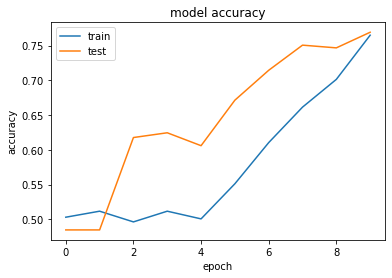

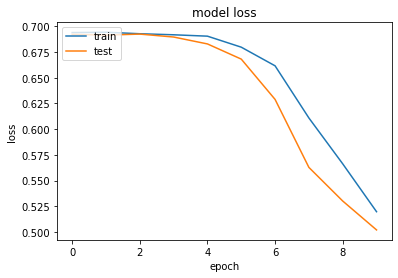

In [101]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
# count vector with nn
model = models.Sequential()
model.add(layers.Dense(100, input_dim=train_count.shape[1], activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(train_count, train_y, epochs=15,batch_size=50,validation_split=0.33)
# evaluate the keras model
_, accuracy = model.evaluate(test_count, test_y)
print('Accuracy: %.2f' % (accuracy*100))

Train on 2077 samples, validate on 1023 samples
Epoch 1/15
2077/2077 [==============================] - 1s 330us/step - loss: 0.8998 - accuracy: 0.4940 - val_loss: 0.6928 - val_accuracy: 0.5210
Epoch 2/15
2077/2077 [==============================] - 0s 89us/step - loss: 0.7364 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5064
Epoch 3/15
2077/2077 [==============================] - 0s 91us/step - loss: 0.7551 - accuracy: 0.4925 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 4/15
2077/2077 [==============================] - 0s 85us/step - loss: 0.7157 - accuracy: 0.4882 - val_loss: 0.6933 - val_accuracy: 0.5073
Epoch 5/15
2077/2077 [==============================] - 0s 88us/step - loss: 0.7083 - accuracy: 0.4964 - val_loss: 0.6927 - val_accuracy: 0.5083
Epoch 6/15
2077/2077 [==============================] - 0s 85us/step - loss: 0.7047 - accuracy: 0.5060 - val_loss: 0.6926 - val_accuracy: 0.5103
Epoch 7/15
2077/2077 [==============================] - 0s 87us/step - loss: 0.69

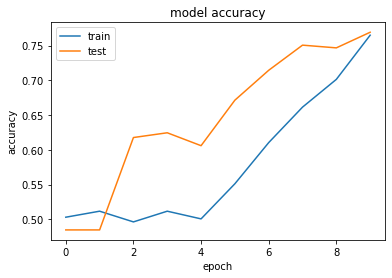

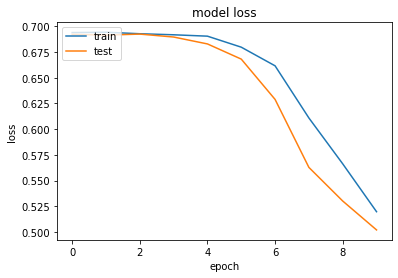

In [96]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
# tf-idf char with nn 
model = models.Sequential()
model.add(layers.Dense(100, input_dim=train_tfidf_ngram_chars.shape[1], activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(train_tfidf_ngram_chars, train_y, epochs=10,batch_size=50,validation_split=0.33)
# evaluate the keras model
_, accuracy = model.evaluate(test_tfidf_ngram_chars, test_y)
print('Accuracy: %.2f' % (accuracy*100))

Train on 2077 samples, validate on 1023 samples
Epoch 1/10
2077/2077 [==============================] - 1s 403us/step - loss: 0.6939 - accuracy: 0.5031 - val_loss: 0.6922 - val_accuracy: 0.4848
Epoch 2/10
2077/2077 [==============================] - 0s 181us/step - loss: 0.6942 - accuracy: 0.5118 - val_loss: 0.6914 - val_accuracy: 0.4848
Epoch 3/10
2077/2077 [==============================] - 0s 180us/step - loss: 0.6927 - accuracy: 0.4964 - val_loss: 0.6924 - val_accuracy: 0.6178
Epoch 4/10
2077/2077 [==============================] - 0s 181us/step - loss: 0.6917 - accuracy: 0.5118 - val_loss: 0.6895 - val_accuracy: 0.6246
Epoch 5/10
2077/2077 [==============================] - 0s 183us/step - loss: 0.6904 - accuracy: 0.5007 - val_loss: 0.6828 - val_accuracy: 0.6061
Epoch 6/10
2077/2077 [==============================] - 0s 179us/step - loss: 0.6797 - accuracy: 0.5513 - val_loss: 0.6681 - val_accuracy: 0.6716
Epoch 7/10
2077/2077 [==============================] - 0s 181us/step - loss

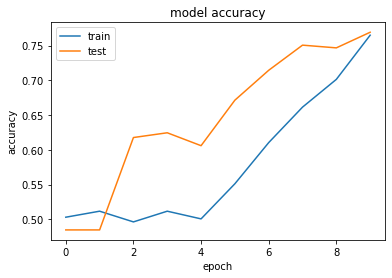

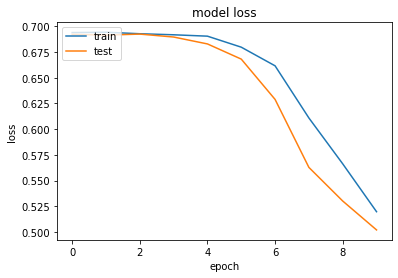

In [93]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word Embedding with NN

In [88]:
model = models.Sequential()
model.add(layers.Embedding(len(word_index) + 1, 20, weights=[embedding_matrix], trainable=True, input_length=70))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(train_seq_x, train_y_origin, validation_split=0.33, epochs=40,batch_size=200)#,validation_data=(test_tfidf_ngram, test_y))
# evaluate the keras model
_, accuracy = model.evaluate(valid_seq_x, valid_y_origin)
print('Accuracy: %.2f' % (accuracy*100))

Train on 1557 samples, validate on 768 samples
Epoch 1/40
1557/1557 [==============================] - 1s 669us/step - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5195
Epoch 2/40
1557/1557 [==============================] - 1s 378us/step - loss: 0.6935 - accuracy: 0.4939 - val_loss: 0.6932 - val_accuracy: 0.4740
Epoch 3/40
1557/1557 [==============================] - 1s 379us/step - loss: 0.6934 - accuracy: 0.4849 - val_loss: 0.6932 - val_accuracy: 0.4818
Epoch 4/40
1557/1557 [==============================] - 1s 381us/step - loss: 0.6919 - accuracy: 0.5209 - val_loss: 0.6932 - val_accuracy: 0.4766
Epoch 5/40
1557/1557 [==============================] - 1s 379us/step - loss: 0.6930 - accuracy: 0.4766 - val_loss: 0.6933 - val_accuracy: 0.4740
Epoch 6/40
1557/1557 [==============================] - 1s 379us/step - loss: 0.6918 - accuracy: 0.5215 - val_loss: 0.6932 - val_accuracy: 0.4753
Epoch 7/40
1557/1557 [==============================] - 1s 379us/step - loss:

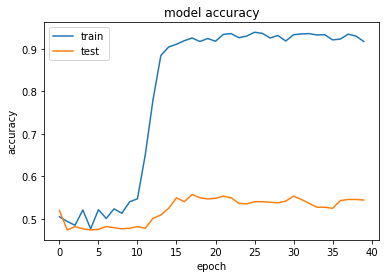

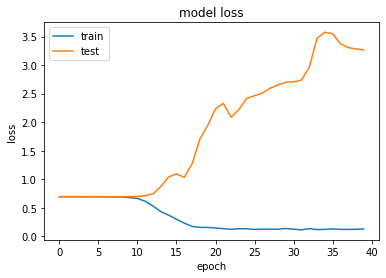

In [89]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Keras Neural Network with general word embedding

# Try Models

## NB

In [ ]:
model = naive_bayes.MultinomialNB()
score = cross_val_score(model, train_count, train_y, cv=10).mean()
score

In [ ]:

score = cross_val_score(model, train_tfidf, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram_chars, train_y, cv=10).mean()
score

## LR

In [ ]:
model = linear_model.LogisticRegression(max_iter=1000)
score = cross_val_score(model, train_count, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram_chars, train_y, cv=10).mean()
score

## SVM

In [ ]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = svm.SVC(kernel=i)
    score = cross_val_score(model, train_count, train_y, cv=10).mean()
    print(i,score)

In [ ]:
for i in [0.01,0.1,1,10]:
    model = svm.SVC(kernel="rbf",C=i)
    score = cross_val_score(model, train_count, train_y, cv=10).mean()
    print(i,score)

In [ ]:

model = svm.SVC(kernel="rbf",C=1)
score = cross_val_score(model, train_tfidf, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram_chars, train_y, cv=10).mean()
score

## RF

In [ ]:
model = ensemble.RandomForestClassifier(oob_score=True)
score = cross_val_score(model, train_count, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram_chars, train_y, cv=10).mean()
score

## Boosting

In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
max_accuracy = 0
depth = 0
for i in max_depth:
    model = xgboost.XGBClassifier(max_depth=i)
    score = cross_val_score(model, train_count, train_y, cv=10).mean()
    if score > max_accuracy:
        max_accuracy = score
        depth = i 
        
print(depth,max_accuracy)

In [ ]:
eta = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10]
max_accuracy = 0
best_eta = 0
for i in eta:
    model = xgboost.XGBClassifier(max_depth=2,eta=i)
    score = cross_val_score(model, train_count, train_y, cv=10).mean()
    if score > max_accuracy:
        max_accuracy = score
        best_eta = i 
        
print(best_eta,max_accuracy)

In [ ]:

model = xgboost.XGBClassifier(max_depth=2,eta=0.3)
score = cross_val_score(model, train_tfidf, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram, train_y, cv=10).mean()
score

In [ ]:
score = cross_val_score(model, train_tfidf_ngram_chars, train_y, cv=10).mean()
score

## References

#### NN and Word2Vec:

https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/Thrones2Vec.ipynb

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://radimrehurek.com/gensim/auto_examples/index.html